#week 4 -Baseline Machine Learning Model(Titanic)
Goal:Build a simple machine learning model to predict survival on the Titanic dataset.

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('/content/titanic_processed.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,sex,Embarked_Q,Embarked_S,family_size,is_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,False,True,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,False,False,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,False,True,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,False,True,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,False,True,1,1


In [13]:
df.drop(columns=['Name', 'Sex', 'embarked','Ticket','Cabin'], inplace=True, errors='ignore')

In [14]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,sex,Embarked_Q,Embarked_S,family_size,is_alone
0,1,0,3,22.0,1,0,7.2500,0,False,True,2,0
1,2,1,1,38.0,1,0,71.2833,1,False,False,2,0
2,3,1,3,26.0,0,0,7.9250,1,False,True,1,1
3,4,1,1,35.0,1,0,53.1000,1,False,True,2,0
4,5,0,3,35.0,0,0,8.0500,0,False,True,1,1


In [15]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (712, 11)
Test size: (179, 11)


In [17]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [18]:
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,sex,Embarked_Q,Embarked_S,family_size,is_alone
331,332,1,45.5,0,0,28.5000,0,False,True,1,1
733,734,2,23.0,0,0,13.0000,0,False,True,1,1
382,383,3,32.0,0,0,7.9250,0,False,True,1,1
704,705,3,26.0,1,0,7.8542,0,False,True,2,0
813,814,3,6.0,4,2,31.2750,1,False,True,7,0


In [19]:
y_pred = model.predict(X_test)

In [20]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.7988826815642458


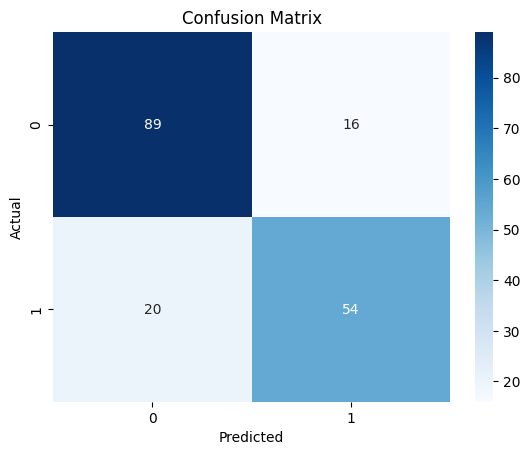

In [21]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [25]:
import joblib
joblib.dump(model, 'titanic_logistic_model.pkl')
print("Model saved as titanic_logistic_model.pkl")


Model saved as titanic_logistic_model.pkl
